In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mintpy
import gdal
from mintpy.utils import plot as pp
from mintpy.utils import readfile, utils as ut 
import h5py
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mintpy import view
from mintpy.objects import timeseries
from operator import itemgetter 
import datetime
from datetime import timedelta
from scipy import interpolate
import matplotlib.dates as mdates
from minopy.objects.invert_pixel import process_pixel 
from scipy import stats
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [15]:
prj = '/Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173'

prj_dirs = [os.path.join(prj, x) for x in ['seq_1', 'seq_3', 'seq_5', 'single_reference']]

thrs = [0.5, 0.5, 0.5, 0.5]
out_dir = './out_figures'


prj2 = '/Volumes/SaraMNew/scratch/mintpy_subsets/BristolDryLakeSenDT173'

prj_dirs2 = [os.path.join(prj2, x) for x in ['seq_1', 'seq_3', 'seq_5']]



In [24]:
## geocodeing
temp_coh = prj_dirs[3] + '/tempCoh_full'
geom_file = prj_dirs[3] + '/inputs/geometryRadar.h5'

for prj in prj_dirs:
    velfile = prj + '/velocity.h5'
    geocode_dir = prj + '/geocoded'
    os.makedirs(geocode_dir, exist_ok=True)
    !geocode.py $velfile -l $geom_file --outdir $geocode_dir --lalo 0.000185185 0.000185185
    !geocode.py $temp_coh -l $geom_file --outdir $geocode_dir --lalo 0.000185185 0.000185185
    !generate_mask.py $geocode_dir/geo_tempCoh_full -m .5 -o $geocode_dir/geo_maskTempCoh.h5

number of processor to be used: 1
resampling software: pyresample
read latitude / longitude from lookup table file: /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173/single_reference/inputs/geometryRadar.h5
output pixel size in (lat, lon) in degree: (-0.000185185, 0.000185185)
output area extent in (S, N, W, E) in degree: (34.314870005800785, 34.585610475800785, -115.8010950949414, -115.47868800994141)
output file row / column number: (1462, 1741)
searching relevant box covering the current SNWE
--------------------------------------------------
resampling file: /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173/seq_1/velocity.h5
update REF_LAT/LON/Y/X
--------------------------------------------------
grab dataset structure from ref_file: /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173/seq_1/velocity.h5
create HDF5 file: /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173/seq_1/geocoded/geo_velocity.h5 with w mode
create dataset  

--------------------------------------------------
resampling file: /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173/seq_5/velocity.h5
update REF_LAT/LON/Y/X
--------------------------------------------------
grab dataset structure from ref_file: /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173/seq_5/velocity.h5
create HDF5 file: /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173/seq_5/geocoded/geo_velocity.h5 with w mode
create dataset  : velocity    of float32                   in size of (1462, 1741)         with compression = None
create dataset  : velocityStd of float32                   in size of (1462, 1741)         with compression = None
close  HDF5 file: /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173/seq_5/geocoded/geo_velocity.h5
--------------------------------------------------
reading velocity    in block (0, 0, 6735, 1870) from velocity.h5 ...
nearest resampling with pyresample.kd_tree using 1 CPU cores in 4 se

view.py /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173/seq_1/geo/geo_velocity.h5 velocity -m /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173/seq_1/geo/geo_maskTempCoh.h5 --notitle --nocbar --alpha 1 --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm -c temperature --scalebar 0.28 0.18 0.04 --scalebar-pad 0.05 --noscalebar --noverbose --nomultilook --sub-lat 34.3143 34.586 --sub-lon -115.8017 -115.478 -v -1 1 --ref-lalo 34.3779 -115.7703
view.py /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173/seq_3/geo/geo_velocity.h5 velocity -m /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT173/seq_1/geo/geo_maskTempCoh.h5 --notitle --nocbar --alpha 1 --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm -c temperature --scalebar 0.28 0.18 0.04 --scalebar-pad 0.05 --noscalebar --noverbose --nomultilook --sub-lat 34.3143 34.586 --sub-lon -115.8017 -115.478 -v -1 1 --ref-lalo 34.3779 -115.7703
view.py /Volumes/SaraMNew/scratch/minopy_subsets/BristolDryLakeSenDT17

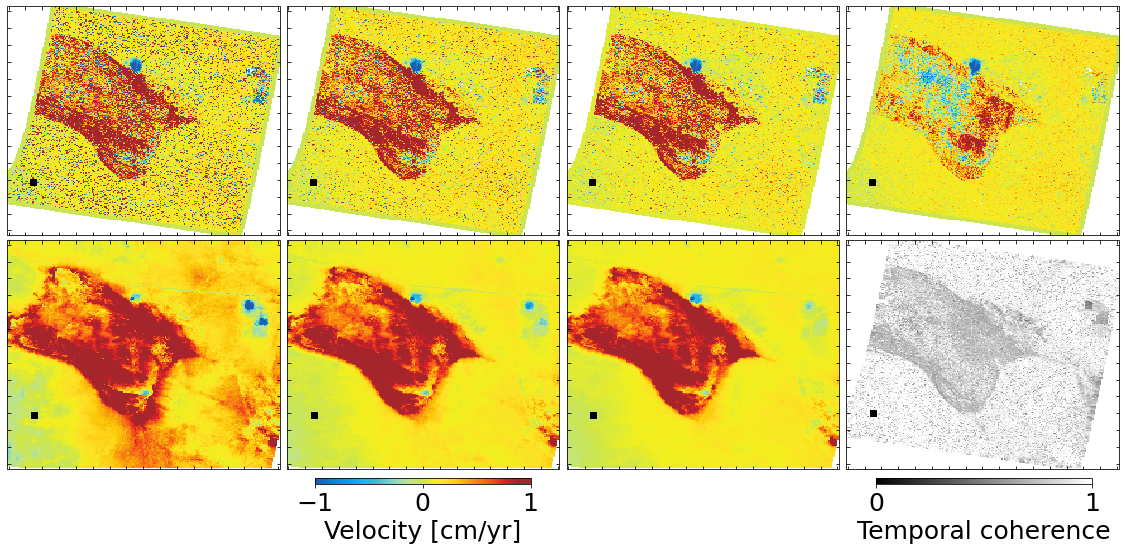

In [48]:
plt.rcParams["font.size"] = "25"

box = ['34.3143:34.5860','-115.8017:-115.4780']
reflat = 34.3779
reflon = -115.7703

lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

opt = ' --notitle --nocbar --alpha 1 '
opt += ' --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm -c temperature '
opt += ' --scalebar 0.28 0.18 0.04 --scalebar-pad 0.05 --noscalebar'
opt += ' --noverbose --nomultilook ' #.format(reflat, reflon)


fig, axs = plt.subplots(nrows=2, ncols=4, 
                        figsize=(20,8.5), subplot_kw=dict(projection=ccrs.PlateCarree()))

col = [0, 1, 2, 3]
row = [0, 0, 0, 0]
labels = ['(b)', '(c)', '(d)', '(e)', '(f)']

for i in range(len(prj_dirs)):

    ax = axs[row[i], col[i]]
    ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
    
    data_lass = os.path.join(prj_dirs[i], 'geo/geo_velocity.h5')
    mask_lass = os.path.join(prj_dirs[0], 'geo/geo_maskTempCoh.h5')

    cmd = 'view.py {} velocity -m {}'.format(data_lass, mask_lass) + opt 

    cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
    cmd += ' -v -{f} {f} --ref-lalo {d1} {d2}'.format(f=1, d1=reflat, d2=reflon)
    
    d_v, atr, inps = view.prep_slice(cmd)
    im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.ylabels_right=False
    gl.xlabels_bottom=False   
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([15.20, 15.30])
    gl.ylocator = mticker.FixedLocator([36.98, 37.06])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    
    if i == 2:
        gl.ylabels_left = True
    if i in [2,3,4]:
        gl.xlabels_bottom=True
        
        
col = [0, 1, 2]
row = [1, 1, 1]
labels = ['(b)', '(c)', '(d)', '(e)', '(f)']

for i in range(len(prj_dirs2)):

    ax = axs[row[i], col[i]]
    ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
    
    data_lass = os.path.join(prj_dirs2[i], 'geo/geo_velocity.h5')
    mask_lass = os.path.join(prj_dirs2[i], 'geo/geo_maskTempCoh.h5')

    cmd = 'view.py {} velocity -m {}'.format(data_lass, mask_lass) + opt 

    cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
    cmd += ' -v -{f} {f} --ref-lalo {d1} {d2}'.format(f=1, d1=reflat, d2=reflon)
    
    d_v, atr, inps = view.prep_slice(cmd)
    im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.ylabels_right=False
    gl.xlabels_bottom=False   
    gl.xlines = True
    #gl.xlocator = mticker.FixedLocator([15.20, 15.30])
    #gl.ylocator = mticker.FixedLocator([36.98, 37.06])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
   
    
        
ax = axs[1, 3]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
    
data_lass = os.path.join(prj_dirs[3], 'geo/geo_temporalCoherence.h5')

opt = ' --notitle --nocbar --alpha 1 '
opt += ' --lalo-step 0.02 --lalo-loc 0 0 0 0 '
opt += ' --scalebar 0.28 0.18 0.04 --scalebar-pad 0.05 --noscalebar'
opt += ' --noverbose --nomultilook ' #.format(reflat, reflon)

cmd = 'view.py {} '.format(data_lass) + opt 

cmd += ' --sub-lat {} {} --sub-lon {} {} -c gray'.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' -v 0 1'
    
d_v, atr, inps = view.prep_slice(cmd)
im2, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=False
gl.xlabels_bottom=False   
gl.xlines = True
#gl.xlocator = mticker.FixedLocator([15.20, 15.30])
#gl.ylocator = mticker.FixedLocator([36.98, 37.06])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


cbar_ax = fig.add_axes([0.34, 0.1, 0.15, 0.01])
fig.colorbar(im, cax=cbar_ax, ticks=[-1, 0, 1], label='Velocity [cm/yr]', orientation='horizontal')

cbar_ax = fig.add_axes([0.73, 0.1, 0.15, 0.01])
fig.colorbar(im2, cax=cbar_ax, ticks=[0, 1], label='Temporal coherence', orientation='horizontal')


fig.subplots_adjust(hspace=0.02, wspace=0.01)


plt.savefig(out_dir +'/Bristol_lake.png', bbox_inches='tight', dpi=300) 
